In [1]:
# This block allows us to import from the benchmark folder,
# as if it was a package installed using pip
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from util import datasets, methods, models
from benchmark.max_sensitivity import max_sensitivity
import itertools
import numpy as np
from os import path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [3]:
# General parameters
batch_size = 16
n_batches = 16
perturbation_range = np.linspace(.01, .2, 10)
n_subsets = 100
data_root = "../data"
use_logits = True
dataset_name = "MNIST"
normalize_attrs = False
aggregation_fn = "avg"

In [4]:
# CIFAR10 parameters
if dataset_name == "CIFAR10":
    dataset = datasets.Cifar(batch_size=batch_size, data_location=path.join(data_root, "CIFAR10"), download=False, shuffle=False, version="cifar10")
    model = models.CifarResnet(version="resnet20", params_loc=path.join(data_root, "models/CIFAR10_resnet20.pth"), num_classes=10, output_logits=use_logits)
    model.eval()

In [5]:
# MNIST parameters
if dataset_name == "MNIST":
    dataset = datasets.MNIST(batch_size=batch_size, data_location=path.join(data_root, "MNIST"), download=False, shuffle=False)
    model = models.MNISTCNN(params_loc=path.join(data_root, "models/MNIST_cnn.pth"), output_logits=use_logits)
    model.eval()

In [6]:
kwargs = {
    "normalize": normalize_attrs,
    "aggregation_fn": aggregation_fn

}

attribution_methods = {
    "GuidedGradCAM": methods.GuidedGradCAM(model, model.get_last_conv_layer(), **kwargs),
    "Gradient": methods.Gradient(model, **kwargs),
    "InputXGradient": methods.InputXGradient(model, **kwargs),
    "IntegratedGradients": methods.IntegratedGradients(model, **kwargs),
    "GuidedBackprop": methods.GuidedBackprop(model, **kwargs),
    "Deconvolution": methods.Deconvolution(model, **kwargs),
}

In [7]:
result = max_sensitivity(data=itertools.islice(dataset.get_dataloader(train=False), n_batches),
                         methods=attribution_methods, perturbation_range=perturbation_range)

Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16


/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.6/site-packages/captum/attr/_utils/gradient.py:33: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.6/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:56: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  "Setting backward hooks on ReLU activations."


In [8]:
result_df = pd.DataFrame.from_dict(
    #{m_name: pd.DataFrame(data=result[m_name]).fillna(0).stack() for m_name in attribution_methods}
    result
).stack().reset_index()
result_df.columns = ["r", "method", "max_sens"]
result_df["r"] = np.array(perturbation_range)[result_df["r"]]
#result_df.columns = ["sample", "n", "method", "correlation"]
#result_df["n"] = np.array(perturbation_range)[result_df["n"]]

In [9]:
result_df


,r,method,max_sens
0,0.010000,GuidedGradCAM,0.108832
1,0.010000,Gradient,2.536949
2,0.010000,InputXGradient,1.776126
3,0.010000,IntegratedGradients,1.784213
4,0.010000,GuidedBackprop,3.168046
5,0.010000,Deconvolution,3.006670
6,0.031111,GuidedGradCAM,0.166132
7,0.031111,Gradient,2.889833
8,0.031111,InputXGradient,2.778835
9,0.031111,IntegratedGradients,2.821197


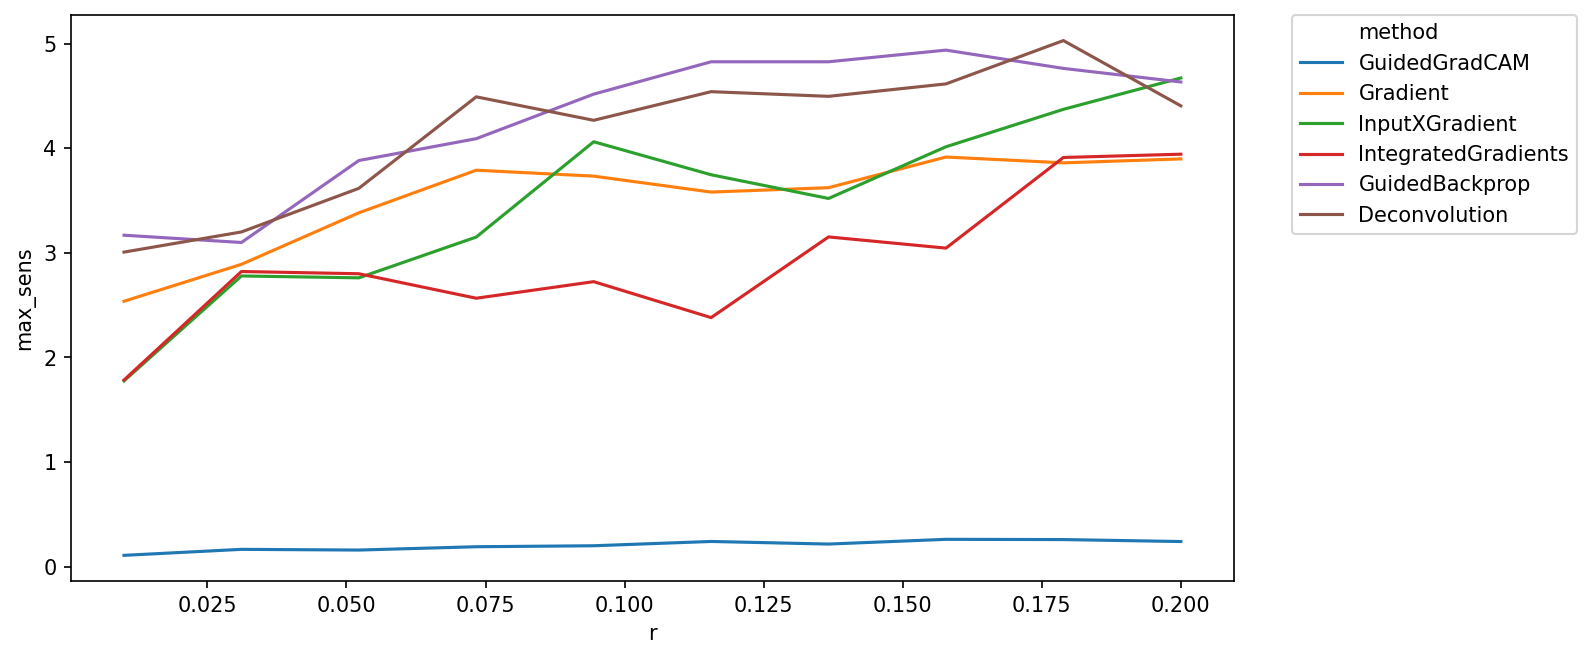

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="r", y="max_sens", hue="method", data=result_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)